In [1]:
!pip3 install torch
!pip3 install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 존재")
print(f"처음 10개 데이터셋: {all_datasets[:10]}")

현재 허브에는 18224개의 데이터셋이 존재
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
# Dataset의 속성
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [11]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [12]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


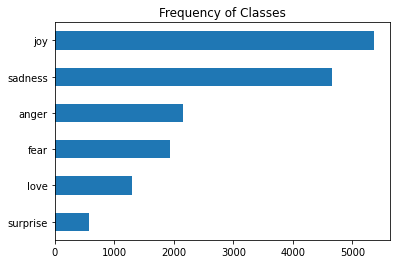

In [14]:
import matplotlib.pyplot as plt

# plot.barh() : Make a horizontal bar plot
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


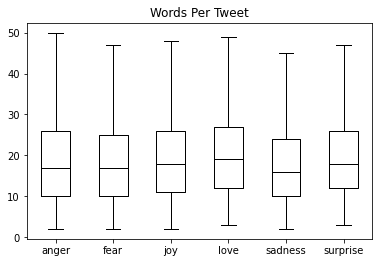

In [15]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
# 데이터셋의 출력 포맷 초기화
emotions.reset_format()

# 토큰화

## 문자 토큰화
각 문자를 개별로 모델에 주입 <br>
파이썬의 str 객체 내부는 사실 배열이므로 문자 수준의 토큰화가 손쉽게 가능

In [17]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [18]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [19]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [20]:
import torch
import torch.nn.functional as F

In [21]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

38개의 입력 토큰 각각에 20차원의 원-핫 벡터가 만들어짐

5 .....len(20) <br>
14.....len(20) <br>
12.....len(20) <br>
.
.
. .....len(20) <br>
2 .....len(20) <br>
4 .....len(20) <br>
1 .....len(20) <br>

각 토큰별 20개의 원소를 가진 벡터가 만들어짐

In [22]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## 단어 토큰화
텍스트를 문자가 아닌 단어로 분할하고 각 단어를 정수로 매핑

In [23]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


단어 토큰화는 단어에 곡용, 활용형, 철자 오류가 포함되어 어휘 사전이 금세 수백만 개까지 늘어나게 됨

단어를 토큰화 하게 되면 어휘사전이 커지게 되고 이러면 신경망의 파라미터 역시 많이 필요하게 됨
<br>
- 어휘 사전의 크기를 제한하는 일반적인 방법은 드물게 등장하는 단어는 무시하는 것. 이러한 단어는 'UNK' 토큰으로 매핑
- 하지만 이렇게 되면 토큰화 과정에서 중요 정보 일부를 잃게 됨
- 모든 입력 정보와 일부 입력 구조를 유지하는 문자 토큰화와 단어 토큰화를 절충하는 방법으로 **부분단어 토큰화(subword tokenization)** 라는 방법

## 부분단어 토큰화
- 부분단어 토큰화는 문자 단어 토큰화 + 단어 토큰화 의 장점을 결합
- 드물게 등장하는 단어를 더 작은 단위로 나누면 모델이 복잡한 단어나 철자 오류를 처리하기 용이
- 다른 방법으론 입력 길이를 적절한 크기로 유지하기 위해 자주 등장하는 단어를 고유한 항목으로 유지
<br><br>
- NLP 분야에서 널리 사용되는 부분단어 토큰화 중 먼저 BERT와 DistilBERT의 토크나이저 **WordPiece**

In [24]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.5 MB/s eta 0:00:00


In [25]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [26]:
encoded_text = tokenizer(text)
print(text)
print(encoded_text)

Tokenizing text is a core task of NLP.
{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [27]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


1. 특수 토큰 [CLS], [SEP]가 시퀀스 처음과 끝에 추가
2. 토큰이 모두 소문자로 변환
3. 'tokenizing'과 'NLP'가 각각 2개의 토큰으로 나뉘어짐. 자주 등장하는 단어가 아니기 때문 ##izing, ##p에 있는 #은 공백이 아님을 의미

이런 접두사가 붙은 토큰은 문자열로 다시 바꿀 때 앞의 토큰과 합침

In [28]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [29]:
# 어휘 사전 크기 확인
tokenizer.vocab_size

30522

In [30]:
# 모델 최대 문맥 크기
tokenizer.model_max_length

512

In [31]:
# 모델이 정방향 패스(forward pass)
tokenizer.model_input_names

['input_ids', 'attention_mask']

# 전체 데이터셋 토큰화


In [32]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

Tokenizer를 샘플 배치에 적용
<br>
- padding=True: 배치에 있는 가장 긴 샘플 크기에 맞춰 샘플을 0으로 패딩
- truncation=True: 모델의 최대 문맥 크기에 맞춰 샘플을 잘라냄

In [33]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [34]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

map() 메서드는 말뭉치에 있는 모든 샘플에 개별적으로 작용 <br>

- batched=True: 트윗을 배치로 인코딩
- batch_size=None: 전체 데이터셋이 하나의 배치로 tokenize() 함수에 적용, 입력 텐서와 어텐션 마스크는 전역적으로 동일한 크기로 생성

In [35]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# 텍스트 분류 모델 훈련

### 특성 추출
사전 훈련된 모델을 수정하지 않고 은닉 상태를 특성(feature)으로 사용해 분류 모델을 훈련

### 미세 튜닝
사전 훈련된 모델의 파라미터도 업데이트하기 위해 전체 모델을 엔드-투-엔드로 훈련

## 1. 텍스트 분류 모델 훈련 - 특성 추출 방법


사전 훈련된 모델 사용하기

In [36]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [38]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [39]:
for k, v in inputs.items():
    print(f"k: {k}")
    print(f"v: {v}")

k: input_ids
v: tensor([[ 101, 2023, 2003, 1037, 3231,  102]])
k: attention_mask
v: tensor([[1, 1, 1, 1, 1, 1]])


In [40]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
    
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [41]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

은닉 상태 텐서의 크기는 [batch_size, n_tokens, hidden_dim] <br>
-> 6개의 입력 토큰마다 768차원의 벡터가 반환

In [42]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [43]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    
    # 마지막 은닉 상태를 추출
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    # [CLS] 토큰에 대한 벡터를 반환
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [44]:
emotions_encoded.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [45]:
# 모든 분할에 대해 은닉 상태를 한 번에 추출
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [46]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

## 특성 행렬 만들기
전처리된 데이터셋에 분류 모델을 훈련하는 데 필요한 모든 정보가 담김 <br>
은닉 상태를 입력 특성으로 사용하고 레이블을 타깃으로 사용

In [47]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
Y_train = np.array(emotions_hidden["train"]["label"])
Y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

## 훈련 세트 시각화
은닉 상태로 모델을 훈련하기 전에 분류하려는 감정에 대한 유용한 표현을 제공하는지 확인이 필요<br>

768차원의 은닉 상태를 시각화하기 어렵기에 UMAP 알고리즘을 사용해 이 벡터를 2D로 투영 <br>
UMAP은 특성이 [0,1] 범위에 놓일 때 잘 작동. 사이킷런의 MinMaxScaler를 적용한 후 umap-learn 라이브러리의 UMAP 구현으로 은닉 상태의 차원을 축소

In [53]:
!pip uninstall umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.8/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.8/dist-packages/umap/distances.py
    /usr/local/lib/python3.8/dist-packages/umap/layouts.py
    /usr/local/lib/python3.8/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.8/dist-packages/umap/plot.py
    /usr/local/lib/python3.8/dist-packages/umap/sparse.py
    /usr/local/lib/python3.8/dist-packages/umap/spectral.py
    /usr/local/lib/python3.8/dist-packages/umap/umap_.py
    /usr/local/lib/python3.8/dist-packages/umap/utils.py
    /usr/local/lib/python3.8/dist-packages/umap/validation.py
Proceed (Y/n)? Y
  Successfully uninstalled umap-0.1.1


In [54]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# from umap import UMAP
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler

# 특성 스케일을 [0,1] 범위로 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련
mapper = umap.UMAP(n_components=2, metric="cosine").fit(X_scaled)

# 2D 임베딩의 데이터프레임을 생성
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = Y_train
df_emb.head()

,X,Y,label
0,4.256140,7.099303,0
1,-2.679181,6.564047,0
2,5.314543,3.535637,3
3,-2.102647,4.541106,2
4,-3.089052,4.619032,3


출력 결과는 훈련 샘플과 개수가 동일한 배열. 하지만 특성은 768개가 아닌 겨우 2개

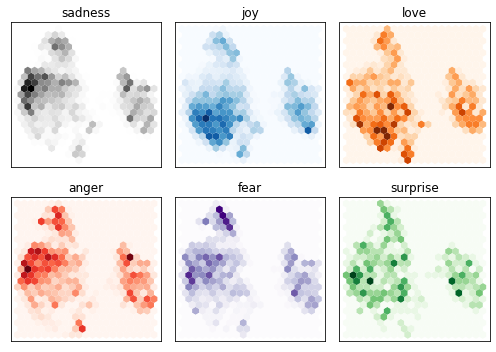

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

### 간단한 분류 모델 훈련
은닉 상태가 감정별로 조금씩 다르지만 일부 감정 사이에는 명확한 경계가 없기도 함 <br>
이 은닉 상태를 사용해 사이킷런의 로지스틱 회귀(logistic regression) 모델을 훈련

In [64]:
from sklearn.linear_model import LogisticRegression

# 수렴을 보장하기 위해 'max_iter'를 증가
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_valid, Y_valid)

0.633

오차 행렬(confusion matrix)

<br>
오차 행렬은 진짜 레이블과 예측 레이블의 관계를 보여줌

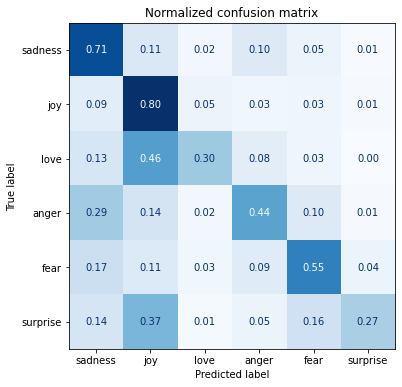

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, Y_valid, labels)

- anger, fear는 sadness와 가장 많이 혼동
- love, surprise는 joy로 많이 오인

## 2. 텍스트 분류 모델 훈련 - 미세 튜닝

트랜스포머를 엔드-투-엔드로 미세 튜닝하는 방법 <br>
미세 튜닝 방식에서는 은닉 상태를 고정된 특성으로 사용하지 않고 전체 모델을 훈련 (분류 헤드는 미분 가능 해야 함)


분류 모델에 입력으로 사용하는 은닉 상태를 훈련하면 분류 작업에 적합하지 않은 데이터를 다룬다는 문제를 회피 할 수 있음

### 사전 훈련된 모델 로드

특성 기반 방식에서 사용한 것과 같은 사전 훈련된 DistilBERT 모델을 사용 <br>

But, AutoModel 대신 AutoModelForSequenceClassification을 사용, 이 모델은 사전 훈련된 모델 출력위에 베이스 모델과 함께 쉽게 훈련할 수 있는 분류 헤드가 있음 <br>

분류 헤드의 출력 크기를 설정하기 위해 모델이 예측할 레이블 개수(여기서는 6)을 지정

In [66]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

모델 일부가 랜덤하게 초기화된다는 경고를 보냄. (분류 헤드가 아직 훈련되지 않아 발생)

#### 성공 지표 정의

미세 튜닝 과정에서 모델 성능을 평가할 때 사용할 측정 지표를 정의 <br>
훈련하는 동안 성능을 모니터링하기 위해 Trainer에 사용할 compute_metrics() 함수를 정의

In [67]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1":f1}

In [69]:
from transformers import Trainer, TrainingArguments

batch_size=64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

In [70]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics, train_dataset=emotions_encoded["train"], eval_dataset=emotions_encoded["validation"], tokenizer=tokenizer)
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.828300,0.308017,0.911000,0.908939
2,0.244800,0.213043,0.921000,0.920982


TrainOutput(global_step=500, training_loss=0.5365411682128907, metrics={'train_runtime': 237.4156, 'train_samples_per_second': 134.785, 'train_steps_per_second': 2.106, 'total_flos': 720342861696000.0, 'train_loss': 0.5365411682128907, 'epoch': 2.0})

In [71]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [72]:
preds_output.metrics

{'test_loss': 0.21304255723953247,
 'test_accuracy': 0.921,
 'test_f1': 0.9209815490643459,
 'test_runtime': 5.5724,
 'test_samples_per_second': 358.913,
 'test_steps_per_second': 5.743}

In [73]:
y_preds = np.argmax(preds_output.predictions, axis=1)

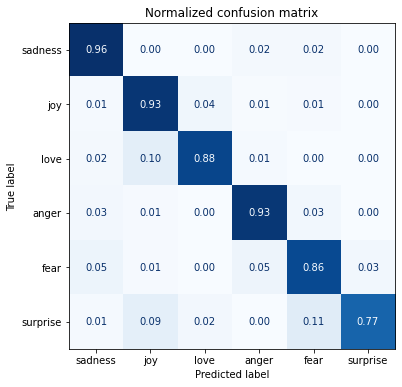

In [75]:
plot_confusion_matrix(y_preds, Y_valid, labels)

#### 오류 분석

모델의 손실 기준으로 검증 샘플을 정렬 <br>
정방향 패스의 결과와 레이블을 사용하면 손실은 자동으로 계산 가능.

In [76]:
# 손실과 예측 레이블을 반환
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  # 모든 입력 텐서를 모델과 같은 장치로 이동
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

  # 다른 데이터셋 열과 호환되도력 출력을 CPU로 옮김
  return {"loss":loss.cpu().numpy(), "predicted_label":pred_label.cpu().numpy()}

map 메서드로 이 함수를 적용해 모든 샘플의 손실을 구함

In [77]:
# 데이터셋을 다시 파이토치 텐서로 변환
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# 손실 값을 계산
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

텍스트, 손실, 예측 레이블과 진짜 레이블로 DataFrame을 생성

In [78]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

emotions_encoded를 손실 기준으로 오름차순 혹은 내림차순으로 정렬

--> 데이터에 레이블을 부여하는 프로세스는 모두 완벽하지 않음 <br>
잘못 레이블링된 샘플이 존재 할 수 있음 앞의 방식을 사용하면 이런 레이블을 빠르게 찾아 수정이 가능

#### 데이터셋의 특이사항
텍스트 데이터에서는 입력에 포함된 특수 문자나 문자열이 모델 예측에 큰 영향을 미치기도 함 <br>
모델의 가장 나쁜 예측을 들여다보게 되면 이런 특성을 찾게 되고, 데이터를 정제하거나 비슷한 샘플을 추가하면 모델이 안정됨

In [79]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.367970
1950,i as representative of everything thats wrong ...,surprise,sadness,5.284013
1274,i am going to several holiday parties and i ca...,joy,sadness,5.276999
1111,im lazy my characters fall into categories of ...,joy,fear,5.139698
1509,i guess this is a memoir so it feels like that...,joy,fear,5.066939
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.032856
1801,i feel that he was being overshadowed by the s...,love,sadness,4.932096
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.787760
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.679534
882,i feel badly about reneging on my commitment t...,love,sadness,4.383337


In [80]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
19,i had lunch with an old friend and it was nice...,joy,joy,0.015154
205,i cannot wait for school to end so i can chang...,joy,joy,0.015296
669,i am not feeling very joyful today its been a ...,joy,joy,0.015381
604,i don t like to use the h word recklessly but ...,joy,joy,0.015426
11,i was dribbling on mums coffee table looking o...,joy,joy,0.015474
1513,i have also been getting back into my gym rout...,joy,joy,0.015520
578,i got to christmas feeling positive about the ...,joy,joy,0.015627
1320,im feeling positive but its impossible to desc...,joy,joy,0.015640
329,i have had my treasury selection on the front ...,joy,joy,0.015814
1263,i feel this way about blake lively,joy,joy,0.015964
